In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
import seaborn as sns

In [2]:
iris_data = sns.load_dataset("iris")

In [5]:
iris_data.groupby("species").corr()

petal_length  petal_width  sepal_length  sepal_width
species                                                                      
setosa     petal_length      1.000000     0.331630      0.267176     0.177700
           petal_width       0.331630     1.000000      0.278098     0.232752
           sepal_length      0.267176     0.278098      1.000000     0.742547
           sepal_width       0.177700     0.232752      0.742547     1.000000
versicolor petal_length      1.000000     0.786668      0.754049     0.560522
           petal_width       0.786668     1.000000      0.546461     0.663999
           sepal_length      0.754049     0.546461      1.000000     0.525911
           sepal_width       0.560522     0.663999      0.525911     1.000000
virginica  petal_length      1.000000     0.322108      0.864225     0.401045
           petal_width       0.322108     1.000000      0.281108     0.537728
           sepal_length      0.864225     0.281108      1.000000     0.457228
           sepal_width       0.401045     0.537728      0.457228     1.000000

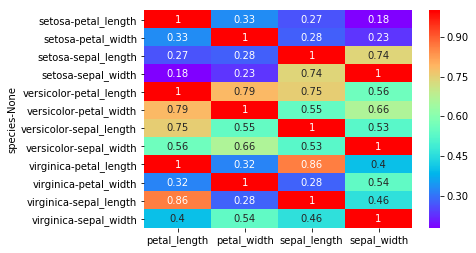

In [8]:
sns.heatmap(iris_data.groupby("species").corr(), annot=True, cmap="rainbow")

#### Our goal is to predict the species based on the characteristics of the variables provded using. support vector machine. Since flowers is not our industry undersanding the data is not the goal here. we will use wbat we know and simply look for the predictions

### Train test spit

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
X = iris_data.drop("species", axis=1)
y = iris_data["species"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Model seems to have a very high predictions capability. We will look into the grid parameters library to see how it will perform even though we know this canot make any additional improvments it will be mostly for practice

In [12]:
s_vector = SVC()

In [13]:
s_vector.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [16]:
pred = s_vector.predict(X_test)

In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        20
   virginica       1.00      1.00      1.00        12

   micro avg       1.00      1.00      1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [18]:
print(confusion_matrix(y_test,pred))

[[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]


## Set up grid -> Thegrid give us a a lower recall so for this purpose the standard SVC would work just fine

In [19]:
grid_param = {"C": [0.1,1,10,100], "gamma":[0.1,0.01,0.001,0.0001]}

In [20]:
grid = GridSearchCV(SVC(), grid_param, verbose=3)

In [25]:
grid.best_estimator_

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [21]:
grid.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..................... C=0.1, gamma=0.1, score=0.75, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.7714285714285715, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.7647058823529411, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.7222222222222222, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.7142857142857143, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.7058823529411765, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ..... C=0.1

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [22]:
preddd = grid.predict(X_test)

In [23]:
print(classification_report(y_test, preddd))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

   micro avg       0.98      0.98      0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [24]:
print(confusion_matrix(y_test,preddd))

[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]
